In [72]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [104]:
# Set up
L = 100
N = 1000
dx = L / N
x = np.arange(-L/2,L/2 -dx,dx)
f = 0*x
f[int((L/2-L/10)/dx):int((L/2+L/10)/dx)] = 1
fhat = np.fft.fft(f)
a = 5 # thermal diffusion constant
y = x
u = np.zeros(len(x))
dt = 0.1

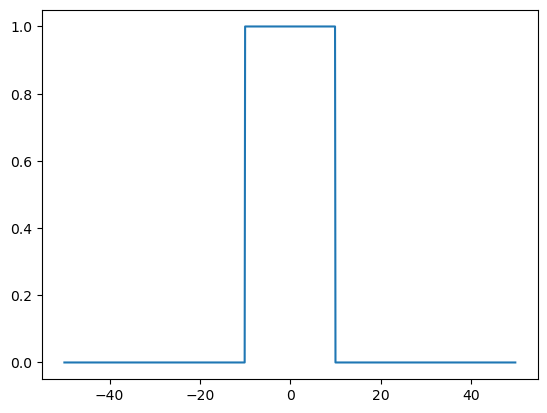

In [105]:
# Initial condition
plt.plot(x, f)

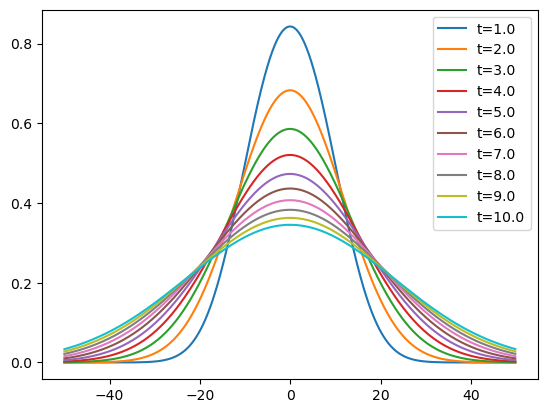

In [75]:
for k in range(1, 101):
    t = k * dt
    for j in range(len(x)):
        xi = x[j] - y
        g = (1/(2*a*np.sqrt(np.pi * t))) * np.exp(-xi**2/(4*a*a*t))
        u[j] = g @ f * dx # dot product
    if k % 10 == 0:
        plt.plot(x, u, label="t={}".format(round(t, 2)))
plt.legend()

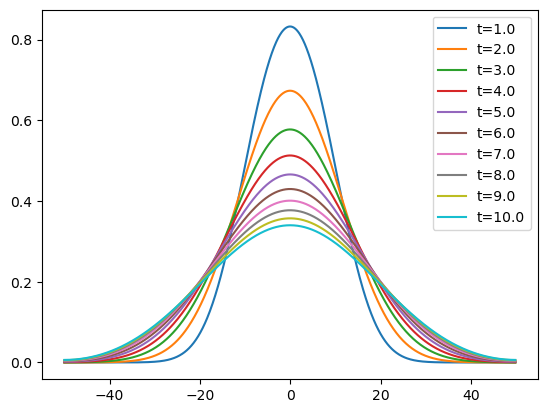

In [106]:
for k in range(1, 101):
    t = k * dt
    Nx = np.max(f.shape)
    kap = 2*np.pi/L * np.arange(-Nx/2,Nx/2,1)
    kap = np.fft.fftshift(kap)
    uhat = fhat * np.exp(-(a**2)*t*(kap**2))
    u = np.fft.ifft(uhat)
    if k % 10 == 0:
        plt.plot(x, u, label="t={}".format(round(t, 2)))
plt.legend()